In [249]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [250]:
#Import The Necessary Library
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [251]:
#Load The Dataset That is on .excel FIle 
data=pd.read_csv('/content/drive/MyDrive/project/Dataset/Telecom_customer_churn.csv')

In [252]:
#Head() Is Used the Show the first 5 Rows Of the Dataset 
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [253]:
#Tail() Is Used the Show the first 5 Rows Of the Dataset 
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [254]:
#Attributes For Each Columns 
data.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [255]:
#Check The Shape Of The Dataset 
data.shape

(7043, 21)

In [256]:
#Here Get the information for each attribute of dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [257]:
#Here Check the datatype for each attribute or column 
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [258]:
#Check the Null Values of each rows in the dataset
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

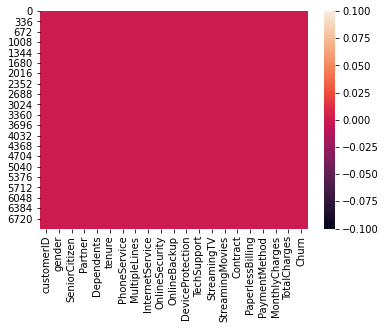

In [259]:
#This is the heatmap that's show the NULL Value is having or not 
sns.heatmap(data.isnull())

In [260]:
categorical = data.select_dtypes(include = ["object"]).keys()
categorical

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [261]:
Numerical = data.select_dtypes(include = ["int64"]).keys()
Numerical

Index(['SeniorCitizen', 'tenure'], dtype='object')

In [262]:
Float = data.select_dtypes(include = ["float64"]).keys()
Float

Index(['MonthlyCharges'], dtype='object')

In [263]:
data[Numerical].describe()#Describe the dataset Column Value 

,SeniorCitizen,tenure
count,7043.000000,7043.000000
mean,0.162147,32.371149
std,0.368612,24.559481
min,0.000000,0.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


In [264]:
data[Float].describe()#Describe the dataset Column Value 

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


# Visualisation of Graphs For Catagorical data


In [265]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


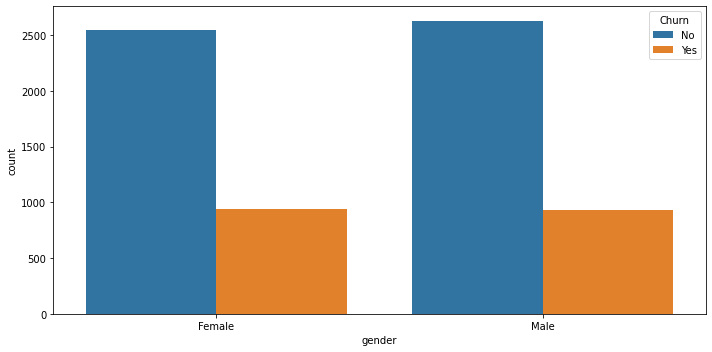

In [266]:
fig = plt.figure(figsize=(10,5))
sns.countplot('gender', hue='Churn', data=data)
plt.tight_layout()
plt.show()

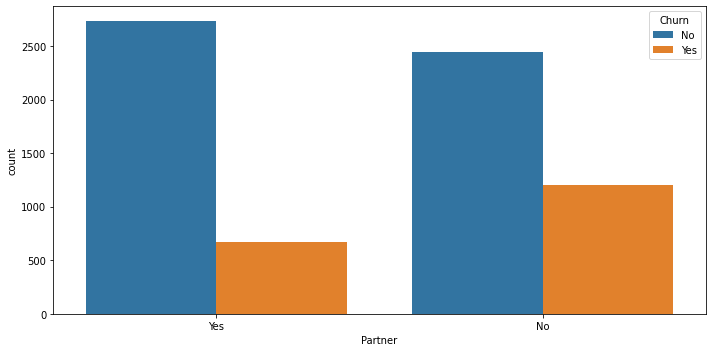

In [267]:
fig = plt.figure(figsize=(10,5))
sns.countplot('Partner', hue='Churn', data=data)
plt.tight_layout()
plt.show()

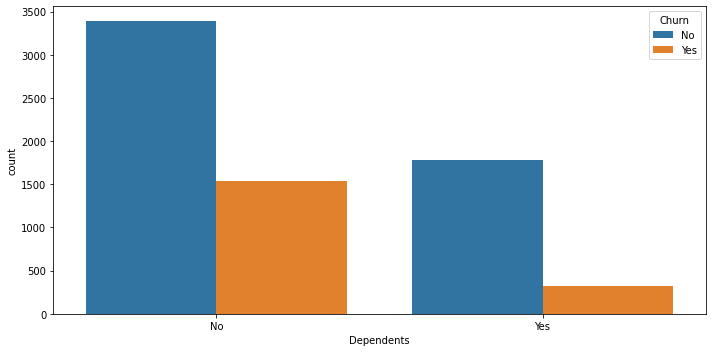

In [268]:
fig = plt.figure(figsize=(10,5))
sns.countplot('Dependents', hue='Churn', data=data)
plt.tight_layout()
plt.show()

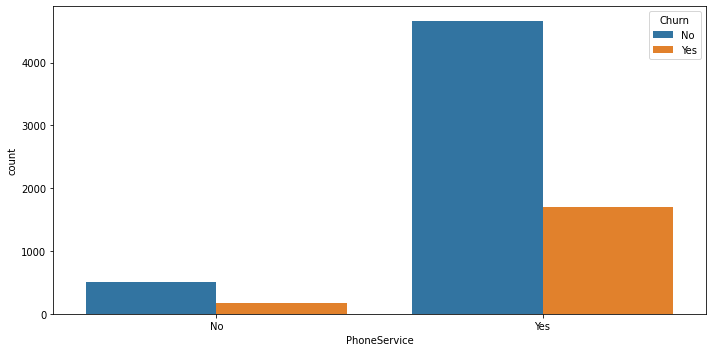

In [269]:
fig = plt.figure(figsize=(10,5))
sns.countplot('PhoneService', hue='Churn', data=data)
plt.tight_layout()
plt.show()

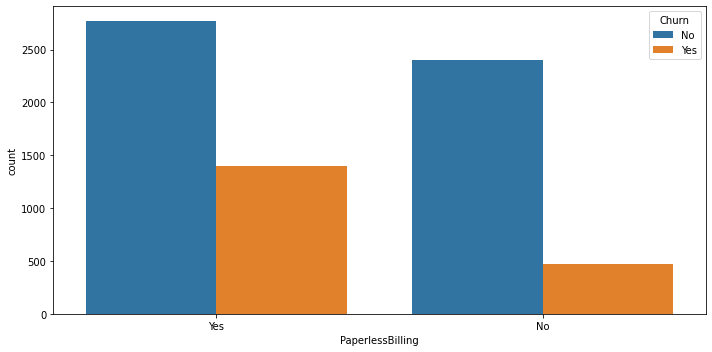

In [270]:
fig = plt.figure(figsize=(10,5))
sns.countplot('PaperlessBilling', hue='Churn', data=data)
plt.tight_layout()
plt.show()

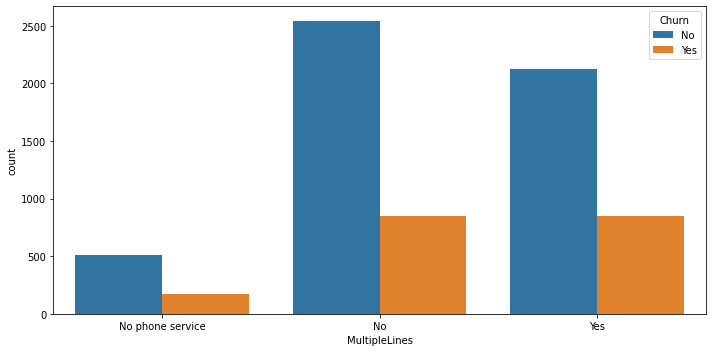

In [271]:
fig = plt.figure(figsize=(10,5))
sns.countplot('MultipleLines', hue='Churn', data=data)
plt.tight_layout()
plt.show()

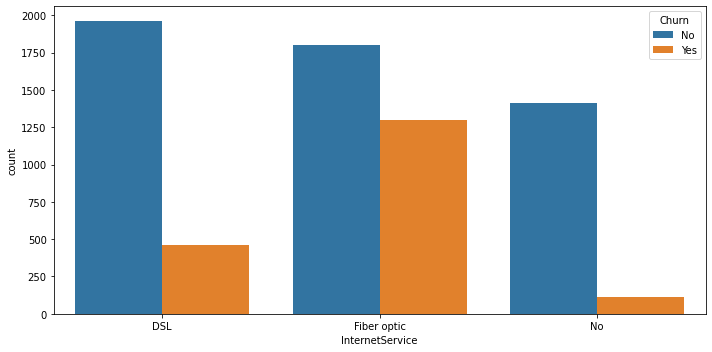

In [272]:
fig = plt.figure(figsize=(10,5))
sns.countplot('InternetService', hue='Churn', data=data)
plt.tight_layout()
plt.show()

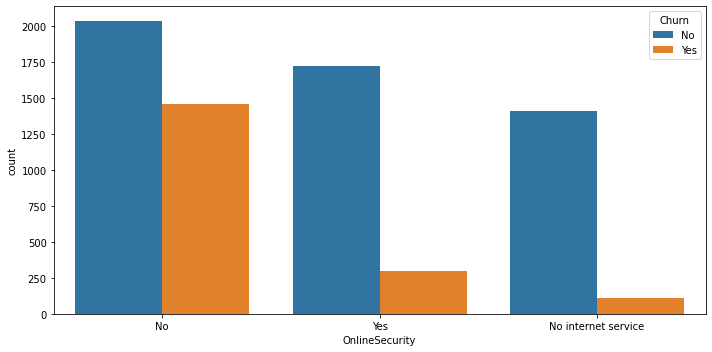

In [273]:
fig = plt.figure(figsize=(10,5))
sns.countplot('OnlineSecurity', hue='Churn', data=data)
plt.tight_layout()
plt.show()

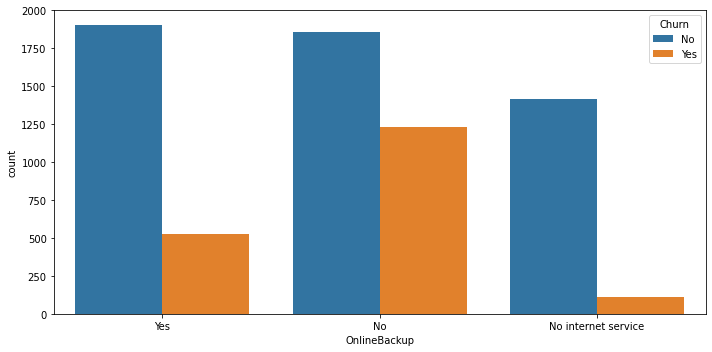

In [274]:
fig = plt.figure(figsize=(10,5))
sns.countplot('OnlineBackup', hue='Churn', data=data)
plt.tight_layout()
plt.show()

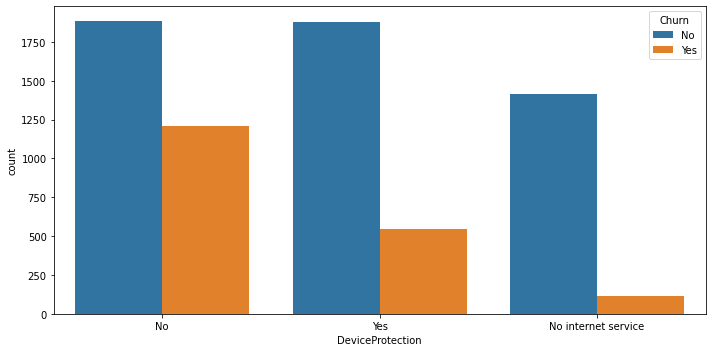

In [275]:
fig = plt.figure(figsize=(10,5))
sns.countplot('DeviceProtection', hue='Churn', data=data)
plt.tight_layout()
plt.show()

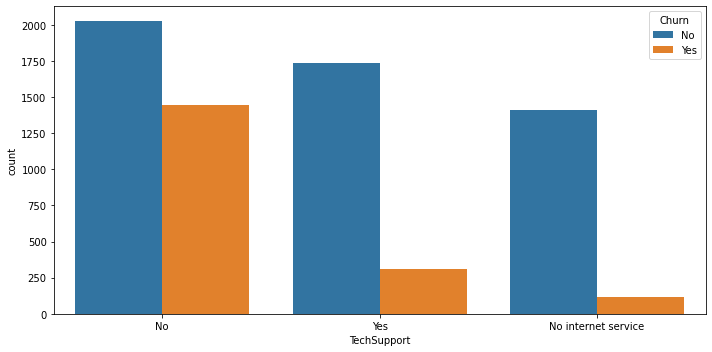

In [276]:
fig = plt.figure(figsize=(10,5))
sns.countplot('TechSupport', hue='Churn', data=data)
plt.tight_layout()
plt.show()

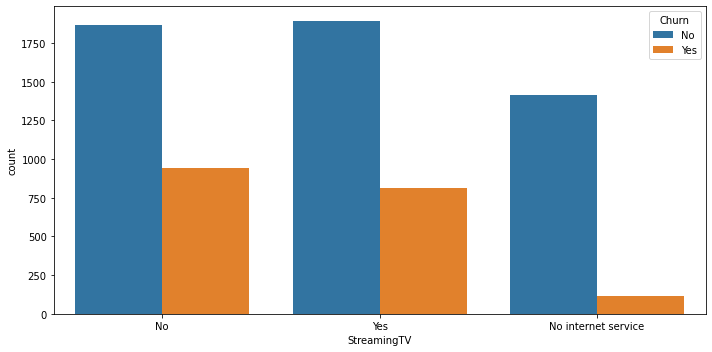

In [277]:
fig = plt.figure(figsize=(10,5))
sns.countplot('StreamingTV', hue='Churn', data=data)
plt.tight_layout()
plt.show()

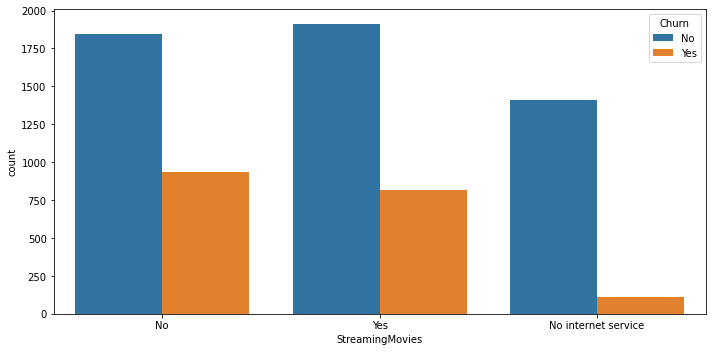

In [278]:
fig = plt.figure(figsize=(10,5))
sns.countplot('StreamingMovies', hue='Churn', data=data)
plt.tight_layout()
plt.show()

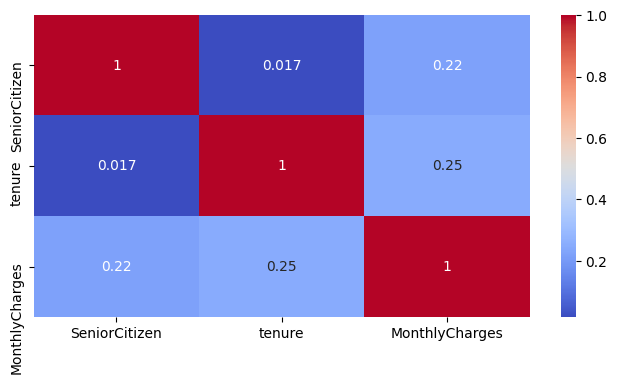

In [279]:
corr_df = data.corr(method='pearson')
plt.figure(figsize=(8,4),dpi=100)
sns.heatmap(corr_df,cmap='coolwarm',annot=True)

In [280]:
from sklearn import preprocessing#Label Encoder is use to convert string column value into integer 
lb=preprocessing.LabelEncoder()

In [281]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [282]:
data['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [283]:
data['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [284]:
data['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [285]:
data['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [286]:
data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [287]:
data['gender']=lb.fit_transform(data['gender'])

In [288]:
data['Partner']=lb.fit_transform(data['Partner'])

In [289]:
data['Dependents']=lb.fit_transform(data['Dependents'])

In [290]:
data['PhoneService']=lb.fit_transform(data['PhoneService'])

In [291]:
data['PaperlessBilling']=lb.fit_transform(data['PaperlessBilling'])

In [292]:
data['Churn']=lb.fit_transform(data['Churn'])

In [293]:
data['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [294]:
data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [295]:
data['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [296]:
data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [297]:
data['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [298]:
data['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [299]:
data['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [300]:
data['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [301]:
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [302]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [303]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
MultipleLines = data[["MultipleLines"]]
MultipleLines = pd.get_dummies(MultipleLines, drop_first = False)
MultipleLines.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0


In [304]:
InternetService = data[["InternetService"]]
InternetService = pd.get_dummies(InternetService, drop_first = False)
InternetService.head()

,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [305]:
OnlineSecurity= data[["OnlineSecurity"]]
OnlineSecurity = pd.get_dummies(OnlineSecurity, drop_first = False)
OnlineSecurity.head()

,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0


In [306]:
OnlineBackup= data[["OnlineBackup"]]
OnlineBackup = pd.get_dummies(OnlineBackup, drop_first = False)
OnlineBackup.head()

,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [307]:
DeviceProtection = data[["DeviceProtection"]]
DeviceProtection = pd.get_dummies(DeviceProtection, drop_first = False)
DeviceProtection.head()

,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0


In [308]:
TechSupport = data[["TechSupport"]]
TechSupport = pd.get_dummies(TechSupport, drop_first = False)
TechSupport.head()

,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0


In [309]:
StreamingTV= data[["StreamingTV"]]
StreamingTV = pd.get_dummies(StreamingTV, drop_first = False)
StreamingTV.head()

,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [310]:
StreamingMovies = data[["StreamingMovies"]]
StreamingMovies = pd.get_dummies(StreamingMovies, drop_first = False)
StreamingMovies.head()

,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [311]:
Contract = data[["Contract"]]
Contract = pd.get_dummies(Contract, drop_first = False)
Contract.head()

,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


In [312]:
PaymentMethod = data[["PaymentMethod"]]
PaymentMethod = pd.get_dummies(PaymentMethod, drop_first = False)
PaymentMethod.head()

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [313]:
data = pd.concat([data,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod], axis=1) 

In [314]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [315]:
data=data.drop(['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod'],axis=1)

In [316]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

In [317]:
data['TotalCharges'].dtypes

dtype('float64')

In [318]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


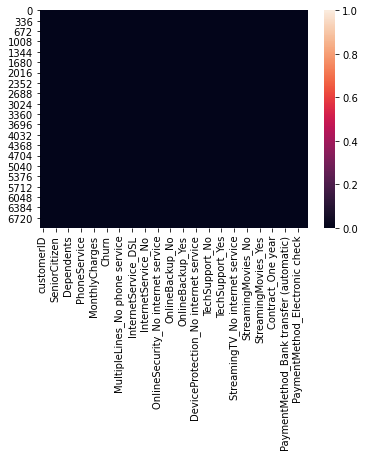

In [319]:
#This is the heatmap that's show the NULL Value is having or not 
sns.heatmap(data.isnull())

In [320]:
data.shape

(7043, 42)

In [321]:
data=data.dropna()

In [322]:
data.shape

(7032, 42)

In [323]:
data.skew()

gender                                    -0.018776
SeniorCitizen                              1.831103
Partner                                    0.070024
Dependents                                 0.880908
tenure                                     0.237731
PhoneService                              -2.729727
PaperlessBilling                          -0.377503
MonthlyCharges                            -0.222103
TotalCharges                               0.961642
Churn                                      1.060622
MultipleLines_No                           0.074584
MultipleLines_No phone service             2.729727
MultipleLines_Yes                          0.316232
InternetService_DSL                        0.658922
InternetService_Fiber optic                0.240682
InternetService_No                         1.379453
OnlineSecurity_No                          0.010810
OnlineSecurity_No internet service         1.379453
OnlineSecurity_Yes                         0.944373
OnlineBackup

In [324]:
x=data[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
        'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']].copy()

In [325]:
x.shape

(7032, 40)

In [326]:
y=data['Churn']

In [327]:
y.shape

(7032,)

In [328]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection=selection.fit(x, y)

In [329]:
print(selection.feature_importances_)

[4.00500115e-02 2.92249964e-02 3.59751399e-02 2.81180279e-02
 1.17638411e-01 3.19212705e-03 3.14492048e-02 1.00218510e-01
 1.27342609e-01 1.40907029e-02 3.33391520e-03 1.20782874e-02
 2.42639047e-04 5.41967933e-02 2.29328534e-04 1.39017840e-02
 3.69215156e-04 1.21174542e-02 1.89017532e-02 2.25236004e-04
 1.23818947e-02 1.50613113e-02 2.70042251e-04 1.53008801e-02
 1.47242151e-02 1.28185277e-04 1.44748209e-02 1.28974249e-02
 9.96054096e-05 1.22756315e-02 1.15796564e-02 1.08905467e-04
 1.26412937e-02 1.64863878e-01 2.04999288e-03 1.61828764e-03
 1.44744027e-02 1.57346155e-02 2.15648559e-02 1.48539538e-02]


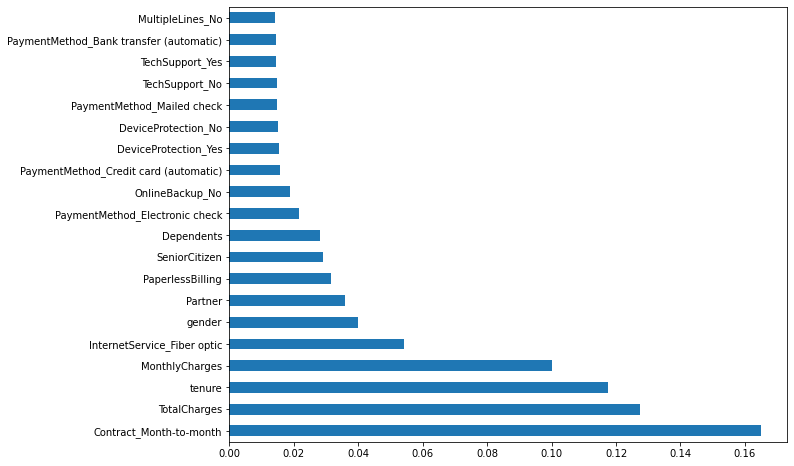

In [330]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (10,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [331]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(selection, prefit=True)
x = selector.transform(x)

In [332]:
y.shape

(7032,)

In [333]:
y=y.values.reshape(-1,1)

In [334]:
x.shape

(7032, 10)

In [335]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,test_size=0.30,random_state=42)

In [336]:
x_train.shape

(4922, 10)

In [337]:
x_test.shape

(2110, 10)

In [338]:
y_train.shape

(4922, 1)

In [339]:
y_test.shape

(2110, 1)

In [340]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=5)
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [341]:
pred=lr.predict(x_test)#Pred
print(' prediction \n',pred)#Print Prediction Value 
lr=print('accuracy score\n',accuracy_score(pred,y_test))
print('confusion metrix\n',confusion_matrix(pred,y_test))
print('classification Report \n',classification_report(pred,y_test))

 prediction 
 [0 0 1 ... 0 0 0]
accuracy score
 0.7881516587677725
confusion metrix
 [[1395  293]
 [ 154  268]]
classification Report 
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      1688
           1       0.48      0.64      0.55       422

    accuracy                           0.79      2110
   macro avg       0.69      0.73      0.70      2110
weighted avg       0.82      0.79      0.80      2110



In [342]:
from sklearn.neighbors import KNeighborsClassifier#KNN ALgorithem to learn the model for prediction 
knc = KNeighborsClassifier(n_neighbors=49)
knc.fit(x_train, y_train)#Fit the model 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=49, p=2,
                     weights='uniform')

In [343]:
pred=knc.predict(x_test)#Pred
print(' prediction \n',pred)#print the predicted Value 
knc=print('accuracy score\n',accuracy_score(pred,y_test))#Accuracy SCore 
print('confusion metrix\n',confusion_matrix(pred,y_test))#Confusion metrix
print('classification Report \n',classification_report(pred,y_test))#Classsifiaction Report 

 prediction 
 [0 0 0 ... 0 0 0]
accuracy score
 0.7748815165876777
confusion metrix
 [[1444  370]
 [ 105  191]]
classification Report 
               precision    recall  f1-score   support

           0       0.93      0.80      0.86      1814
           1       0.34      0.65      0.45       296

    accuracy                           0.77      2110
   macro avg       0.64      0.72      0.65      2110
weighted avg       0.85      0.77      0.80      2110



In [344]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [345]:
pred=svc.predict(x_test)#Pred
print(' prediction \n',pred)#print the predicted Value 
svc=print('accuracy score\n',accuracy_score(pred,y_test))#Accuracy SCore 
print('confusion metrix\n',confusion_matrix(pred,y_test))#Confusion metrix
print('classification Report \n',classification_report(pred,y_test))#Classsifiaction Report 

 prediction 
 [0 0 0 ... 0 0 0]
accuracy score
 0.7341232227488151
confusion metrix
 [[1549  561]
 [   0    0]]
classification Report 
               precision    recall  f1-score   support

           0       1.00      0.73      0.85      2110
           1       0.00      0.00      0.00         0

    accuracy                           0.73      2110
   macro avg       0.50      0.37      0.42      2110
weighted avg       1.00      0.73      0.85      2110



In [346]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier() #max_leaf_nodes=12 #random_state=1
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [347]:
pred=tree.predict(x_test)#Pred
print(' prediction \n',pred)#print the predicted Value 
tree=print('accuracy score\n',accuracy_score(pred,y_test))#Accuracy SCore 
print('confusion metrix\n',confusion_matrix(pred,y_test))#Confusion metrix
print('classification Report \n',classification_report(pred,y_test))#Classsifiaction Report 

 prediction 
 [0 0 1 ... 0 0 0]
accuracy score
 0.7246445497630332
confusion metrix
 [[1254  286]
 [ 295  275]]
classification Report 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1540
           1       0.49      0.48      0.49       570

    accuracy                           0.72      2110
   macro avg       0.65      0.65      0.65      2110
weighted avg       0.72      0.72      0.72      2110



In [348]:
from sklearn.ensemble import RandomForestClassifier
b = RandomForestClassifier(max_leaf_nodes=14)
b.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=14, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [349]:
pred=b.predict(x_test)#Pred
print(' prediction \n',pred)#print the predicted Value 
b=print('accuracy score\n',accuracy_score(pred,y_test))#Accuracy SCore 
print('confusion metrix\n',confusion_matrix(pred,y_test))#Confusion metrix
print('classification Report \n',classification_report(pred,y_test))#Classsifiaction Report 

 prediction 
 [0 0 1 ... 0 0 0]
accuracy score
 0.7895734597156399
confusion metrix
 [[1433  328]
 [ 116  233]]
classification Report 
               precision    recall  f1-score   support

           0       0.93      0.81      0.87      1761
           1       0.42      0.67      0.51       349

    accuracy                           0.79      2110
   macro avg       0.67      0.74      0.69      2110
weighted avg       0.84      0.79      0.81      2110



In [350]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(max_samples=0.5,max_features=0.5)
bagging.fit(x_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=0.5, max_samples=0.5, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [351]:
pred=bagging.predict(x_test)#Pred
print(' prediction \n',pred)#print the predicted Value 
bagging=print('accuracy score\n',accuracy_score(pred,y_test))#Accuracy SCore 
print('confusion metrix\n',confusion_matrix(pred,y_test))#Confusion metrix
print('classification Report \n',classification_report(pred,y_test))#Classsifiaction Report 

 prediction 
 [0 0 1 ... 0 0 0]
accuracy score
 0.771563981042654
confusion metrix
 [[1387  320]
 [ 162  241]]
classification Report 
               precision    recall  f1-score   support

           0       0.90      0.81      0.85      1707
           1       0.43      0.60      0.50       403

    accuracy                           0.77      2110
   macro avg       0.66      0.71      0.68      2110
weighted avg       0.81      0.77      0.78      2110



In [352]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(n_estimators=200,learning_rate=.02)
GBC.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [353]:
pred=GBC.predict(x_test)#Pred
print(' prediction \n',pred)#print the predicted Value 
GBC=print('accuracy score\n',accuracy_score(pred,y_test))#Accuracy SCore 
print('confusion metrix\n',confusion_matrix(pred,y_test))#Confusion metrix
print('classification Report \n',classification_report(pred,y_test))#Classsifiaction Report 

 prediction 
 [0 0 1 ... 0 0 0]
accuracy score
 0.7971563981042654
confusion metrix
 [[1407  286]
 [ 142  275]]
classification Report 
               precision    recall  f1-score   support

           0       0.91      0.83      0.87      1693
           1       0.49      0.66      0.56       417

    accuracy                           0.80      2110
   macro avg       0.70      0.75      0.72      2110
weighted avg       0.83      0.80      0.81      2110



In [354]:
from sklearn.naive_bayes import BernoulliNB 
gnb = BernoulliNB() 
gnb.fit(x_train, y_train) 

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [355]:
pred=gnb.predict(x_test)
print(' prediction \n',pred)
print('accuracy score\n',accuracy_score(pred,y_test))
print('confusion metrix\n',confusion_matrix(pred,y_test))
print('classification Report \n',classification_report(pred,y_test))

 prediction 
 [0 0 1 ... 0 0 0]
accuracy score
 0.7545023696682465
confusion metrix
 [[1290  259]
 [ 259  302]]
classification Report 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1549
           1       0.54      0.54      0.54       561

    accuracy                           0.75      2110
   macro avg       0.69      0.69      0.69      2110
weighted avg       0.75      0.75      0.75      2110



In [356]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [357]:
score=cross_val_score(gnb,x,y,cv=5,scoring='accuracy')
print('score of mean \n',score.mean())
print('score of standard devition \n',score.std())
y_pred=cross_val_predict(gnb,x,y,cv=5)
print('prediction \n',y_pred)
confu=confusion_matrix(y,y_pred)
print('confusion matrix \n',confu)

score of mean 
 0.7653539860138446
score of standard devition 
 0.015268371481603637
prediction 
 [0 0 0 ... 0 1 0]
confusion matrix 
 [[4339  824]
 [ 826 1043]]


In [358]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    pred=svc.predict(x_test)
    print(' prediction \n',pred)
    print('accuracy score\n',accuracy_score(pred,y_test))
    print('confusion metrix\n',confusion_matrix(pred,y_test))
    print('classification Report \n',classification_report(pred,y_test))
    

In [359]:
svmkernel('poly')

 prediction 
 [0 0 0 ... 0 0 0]
accuracy score
 0.7341232227488151
confusion metrix
 [[1549  561]
 [   0    0]]
classification Report 
               precision    recall  f1-score   support

           0       1.00      0.73      0.85      2110
           1       0.00      0.00      0.00         0

    accuracy                           0.73      2110
   macro avg       0.50      0.37      0.42      2110
weighted avg       1.00      0.73      0.85      2110



In [360]:
svmkernel('rbf')

 prediction 
 [0 0 0 ... 0 0 0]
accuracy score
 0.7341232227488151
confusion metrix
 [[1549  561]
 [   0    0]]
classification Report 
               precision    recall  f1-score   support

           0       1.00      0.73      0.85      2110
           1       0.00      0.00      0.00         0

    accuracy                           0.73      2110
   macro avg       0.50      0.37      0.42      2110
weighted avg       1.00      0.73      0.85      2110



In [361]:
svmkernel('linear')

 prediction 
 [0 0 0 ... 0 0 0]
accuracy score
 0.7853080568720379
confusion metrix
 [[1442  346]
 [ 107  215]]
classification Report 
               precision    recall  f1-score   support

           0       0.93      0.81      0.86      1788
           1       0.38      0.67      0.49       322

    accuracy                           0.79      2110
   macro avg       0.66      0.74      0.68      2110
weighted avg       0.85      0.79      0.81      2110



In [362]:
from sklearn.externals import joblib
joblib.dump(data,'customer churn.pkl')

['customer churn.pkl']